In [23]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import os

from statsmodels.graphics.gofplots import qqplot_2samples

import sklearn

import numpy as np


%matplotlib inline

with open('parcel_data_list.txt') as f:
    parcel_data_list = f.read()

print(parcel_data_list.split())

['city_data/anchorage.csv', 'city_data/atlanta.csv', 'city_data/austin.csv', 'city_data/boston.csv', 'city_data/buffalo.csv', 'city_data/denver.csv', 'city_data/detroit.csv', 'city_data/durham.csv', 'city_data/madison.csv', 'city_data/milwaukee.csv', 'city_data/minneapolis.csv', 'city_data/newark.csv', 'city_data/philadelphia.csv', 'city_data/raleigh.csv', 'city_data/san_francisco.csv', 'city_data/santa_monica.csv', 'city_data/washoe_reno.csv', 'city_data/wichita.csv']


In [24]:
all_paths = parcel_data_list.split()
all_cities = [os.path.basename(path).split('.')[0] for path in all_paths]

paths_and_cities = zip(all_paths, all_cities)
 
all_df = {p[1]: pd.read_csv(p[0]) for p in paths_and_cities}

In [25]:
age_value_cols = {'anchorage': ['Year Built', 'Appraised Total Value'],
 'atlanta': ['RESYRBLT','TOT_APPR'],
 'austin': ['YR_BUILT', 'APPRAISED_'],
 'boston': ['YR_BUILT', 'AV_TOTAL'],
 'buffalo': ['YEAR BUILT', 'TOTAL VALUE'],
 'denver': ['CCYRBLT', 'TOTAL_VALUE'],
 'detroit': ['Year Built', 'Taxable Value'],
 'durham': ['ACTUAL_YEAR_BUILT','TOTAL_ASS_VALUE'],
 'madison': ['YearBuilt', 'CurrentTotal'],
 'milwaukee': ['YR_BUILT','C_A_TOTAL'],
 'minneapolis': ['YEARBUILT','TOTALVALUE'],
 'newark': ['YearBuilt', 'TotalValue'],
 'philadelphia': ['year_built', 'market_value'],
 'raleigh': ['YEAR_BUILT', 'TOTAL_VALUE_ASSD'],
 'san_francisco': ['Year Property Built', 'Assessed Personal Property Value'],
 'santa_monica': ['YearBuilt','TotalValue'],
 'washoe_reno': ['YEARBLT','TOTALASS'],
 'wichita': ['YrBuilt', 'TotVal']}

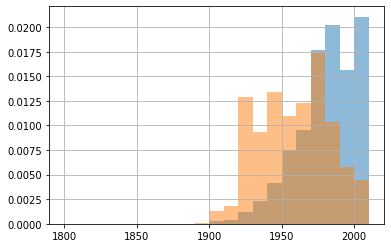

In [26]:
all_df['austin']['YR_BUILT'].hist(bins=range(1800, 2020, 10), density=True, alpha=0.5)
all_df['santa_monica']['YearBuilt'].hist(bins=range(1800, 2020, 10), density=True, alpha=0.5)

In [27]:
for key, df in all_df.items():
    df.dropna(subset=age_value_cols[key], inplace=True)

In [28]:
flint_data = pd.read_csv('city_data/z_data_flint.csv', encoding='latin-1')
flint_data.columns

Index(['Index', 'street', 'zipcode', 'city', 'state', 'latitude', 'longitude',
       'useCode', 'taxAssessmentYear', 'taxAssessment', 'yearBuilt',
       'Accessed', 'Address'],
      dtype='object')

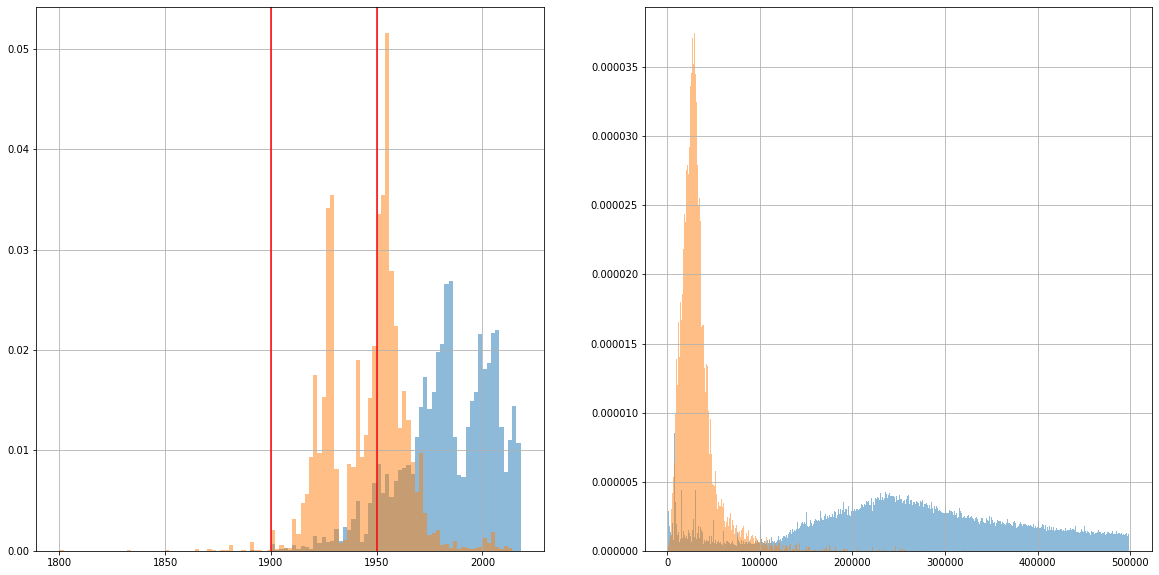

In [29]:
def year_histogram(municipality):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    axes = all_df[municipality][age_value_cols[municipality][0]].hist(bins=range(1800, 2020, 2), density=True, alpha=0.5)
    flint_data['yearBuilt'].hist(bins=range(1800, 2020, 2), density=True, alpha=0.5)
    plt.axvline(x=1900, color='red')
    plt.axvline(x=1950, color='red')
    plt.subplot(1, 2, 2)
    all_df[municipality][age_value_cols[municipality][1]].hist(bins=range(1000, 500000, 1000),density=True, alpha=0.5)
    flint_data['taxAssessment'].hist(bins=range(1000, 500000, 1000),density=True, alpha=0.5)

year_histogram('austin')

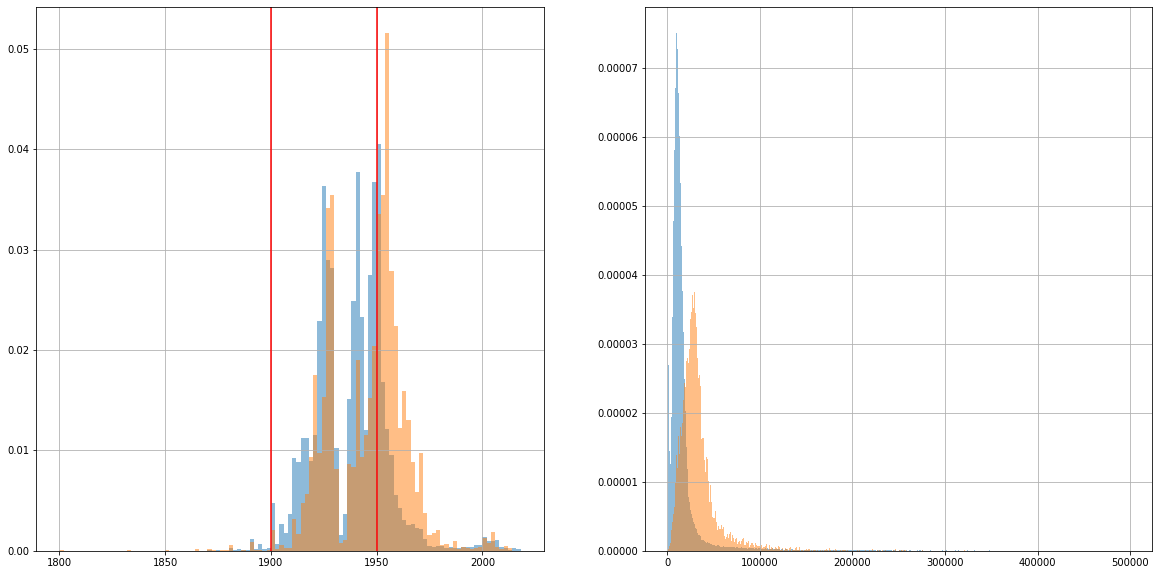

In [30]:
year_histogram('detroit')

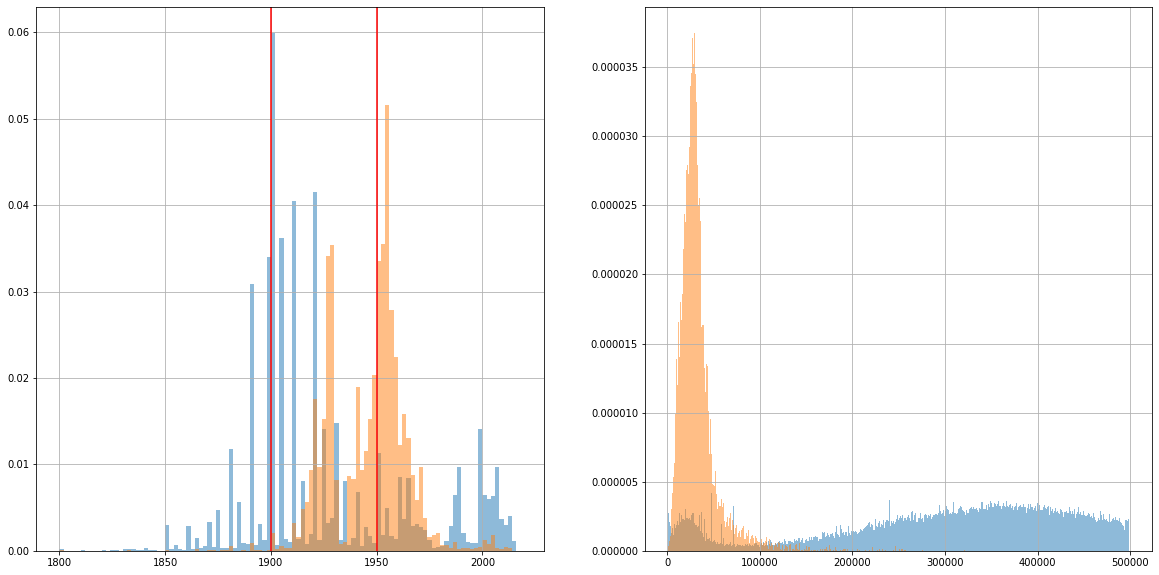

In [31]:
year_histogram('boston')

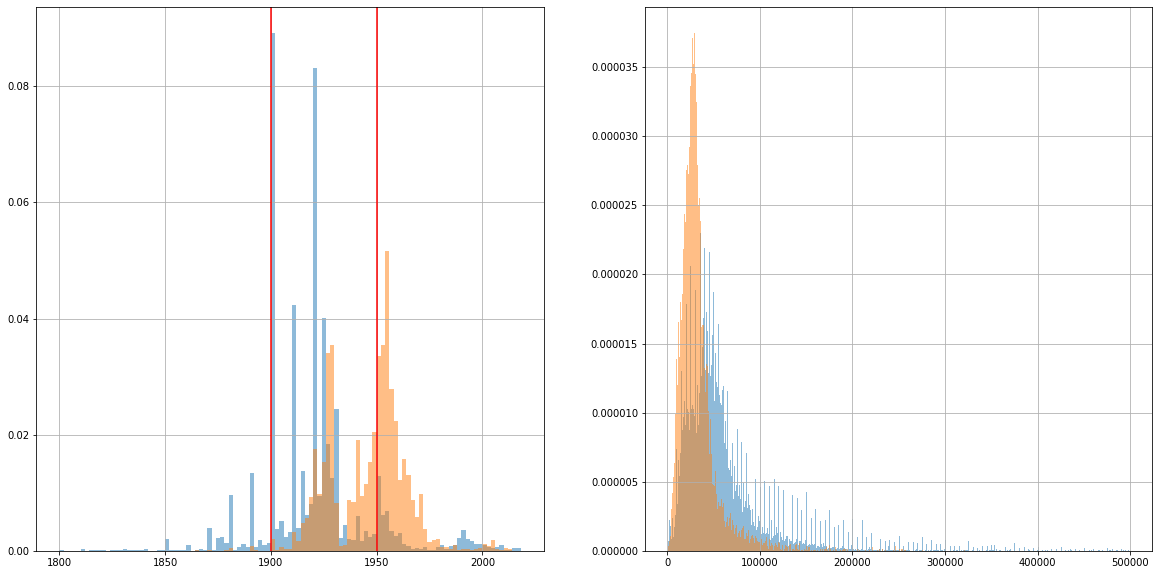

In [32]:
year_histogram('buffalo')

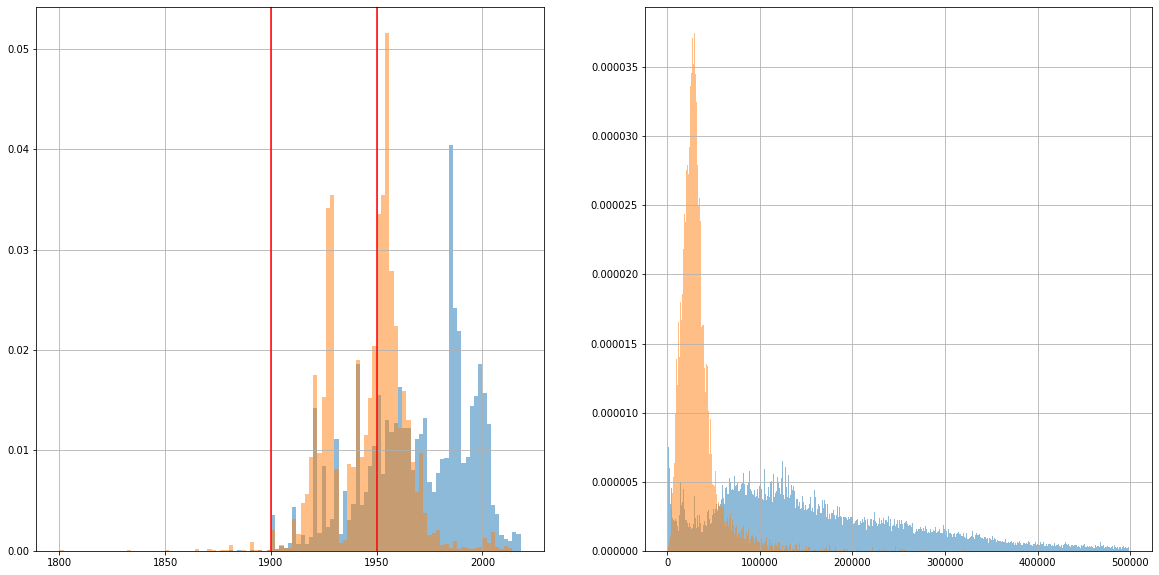

In [33]:
year_histogram('durham')

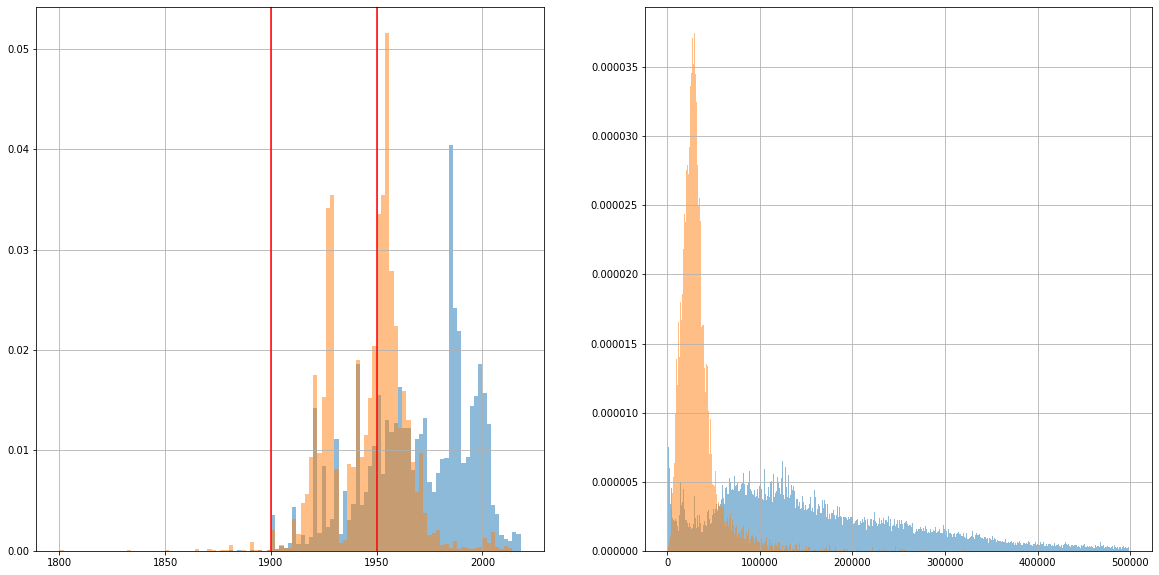

In [34]:
year_histogram('durham')

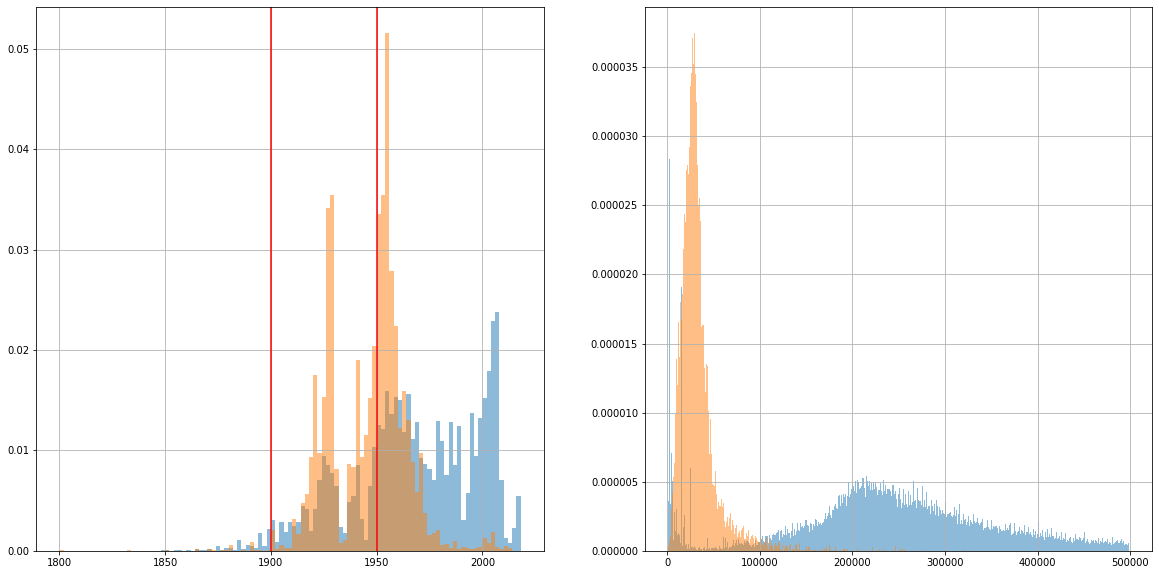

In [35]:
year_histogram('madison')

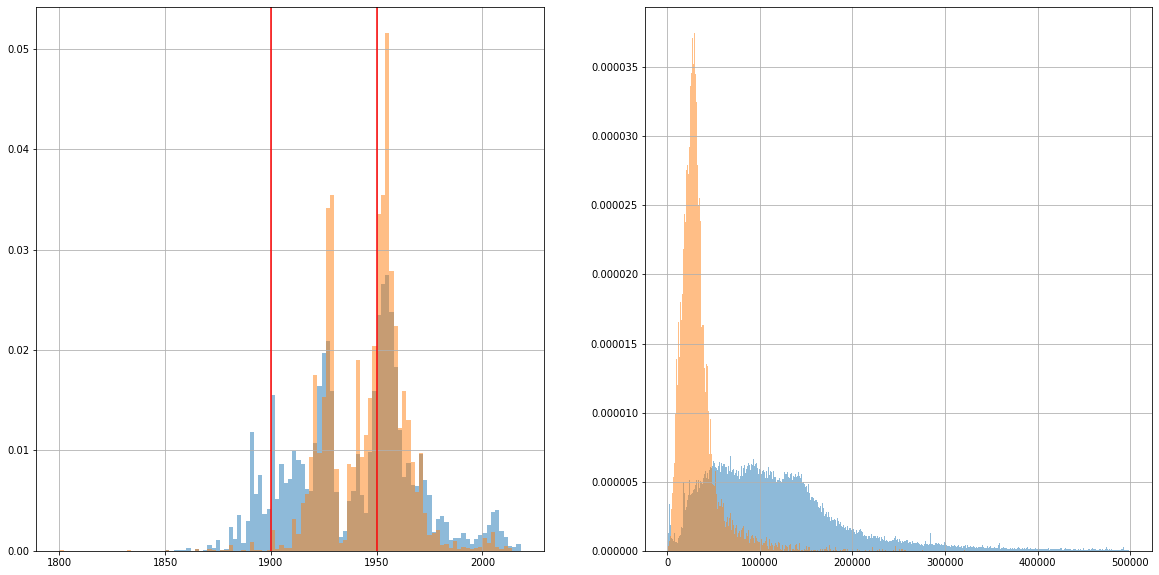

In [36]:
year_histogram('milwaukee')

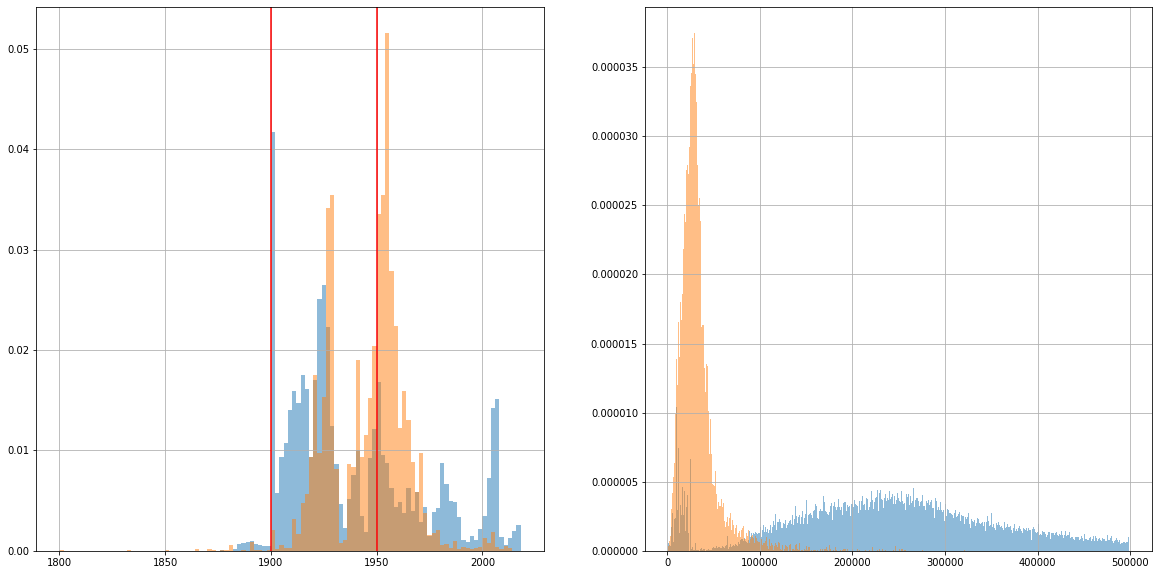

In [37]:
year_histogram('minneapolis')

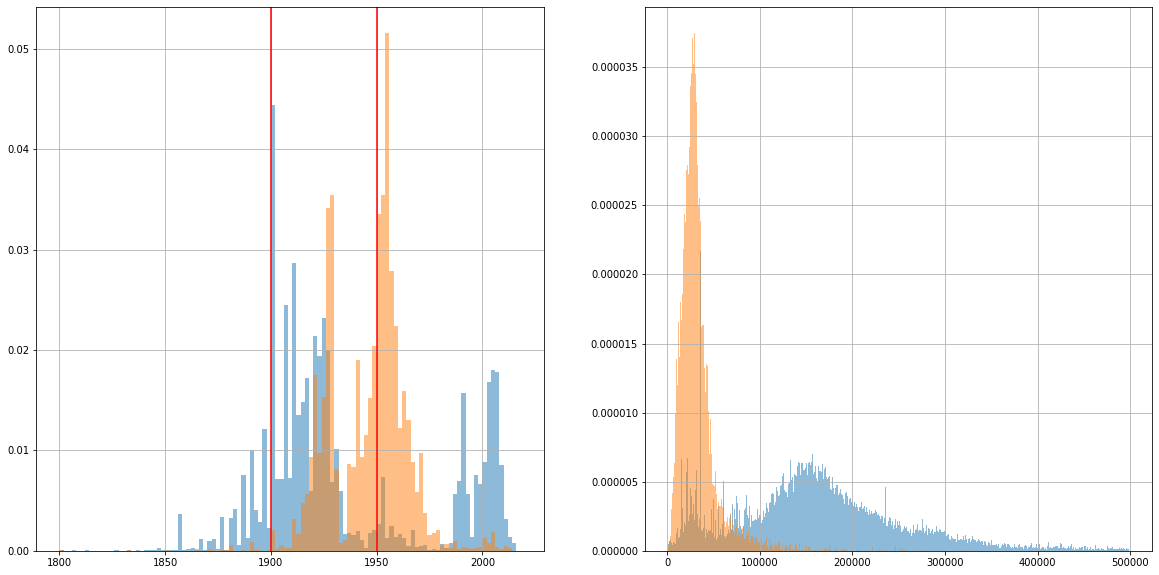

In [38]:
year_histogram('newark')

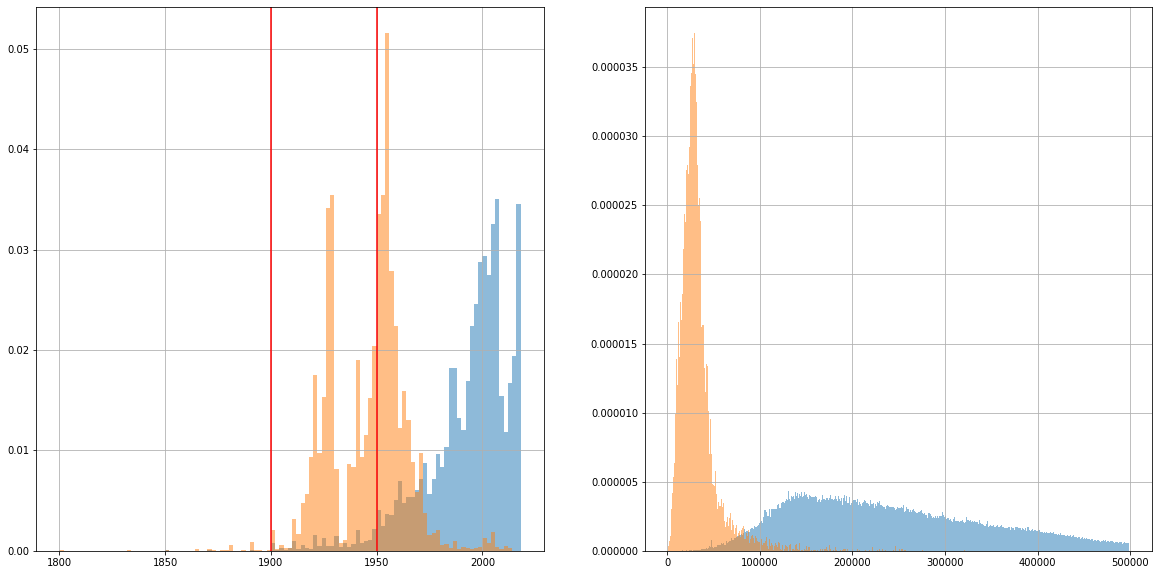

In [39]:
year_histogram('raleigh')

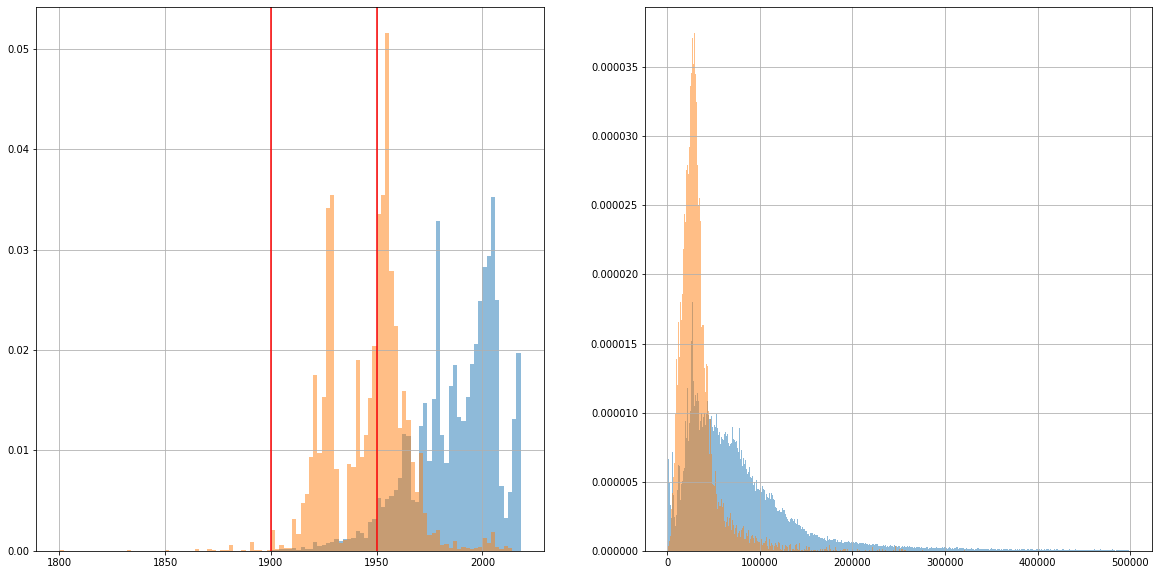

In [40]:
year_histogram('washoe_reno')

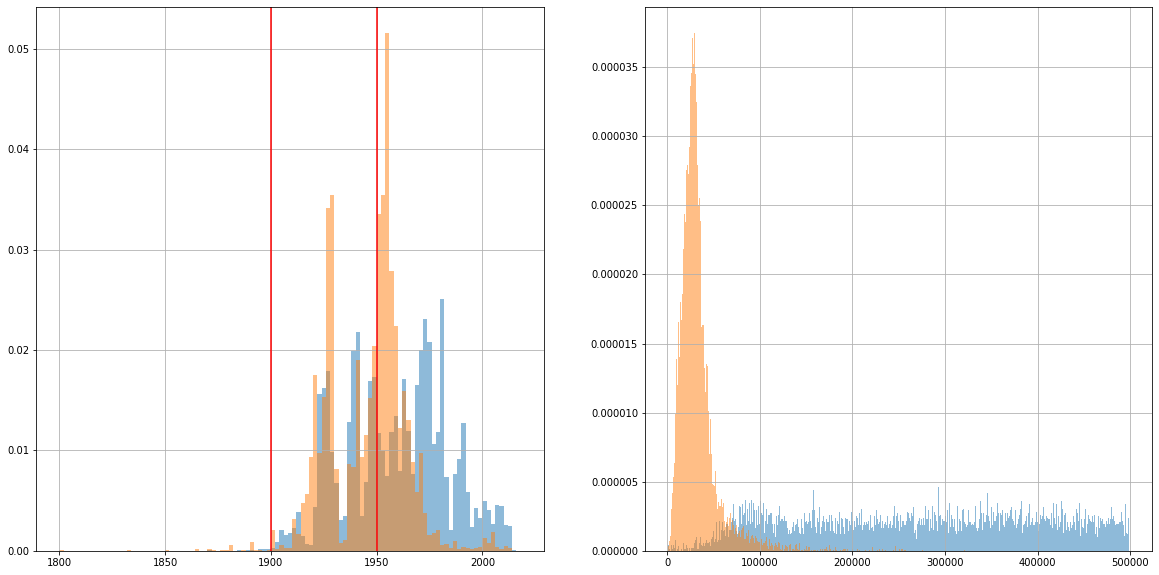

In [41]:
year_histogram('santa_monica')

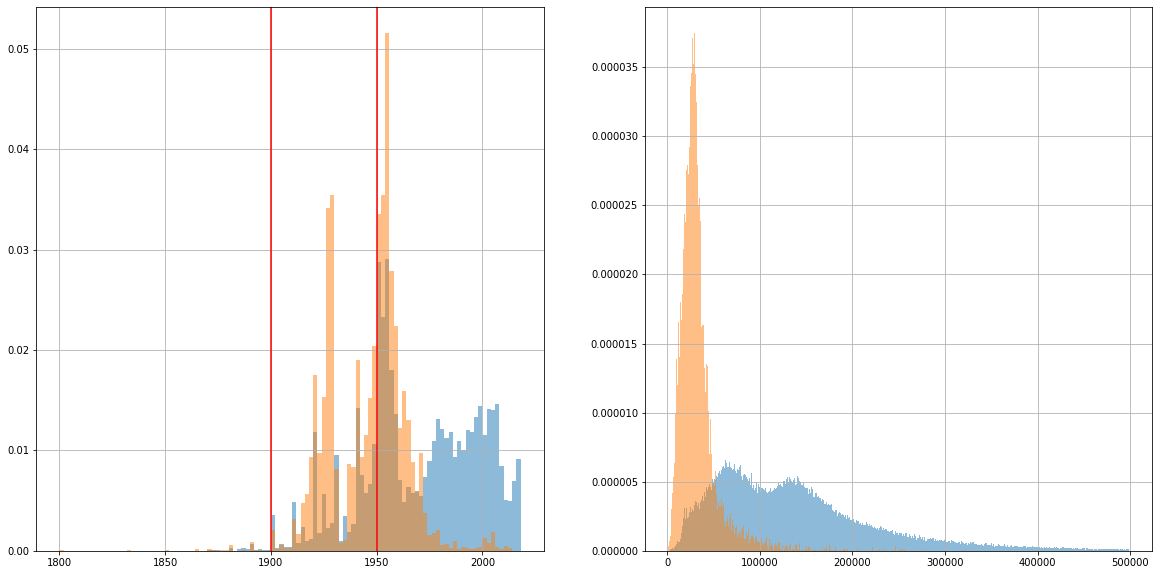

In [42]:
year_histogram('wichita')

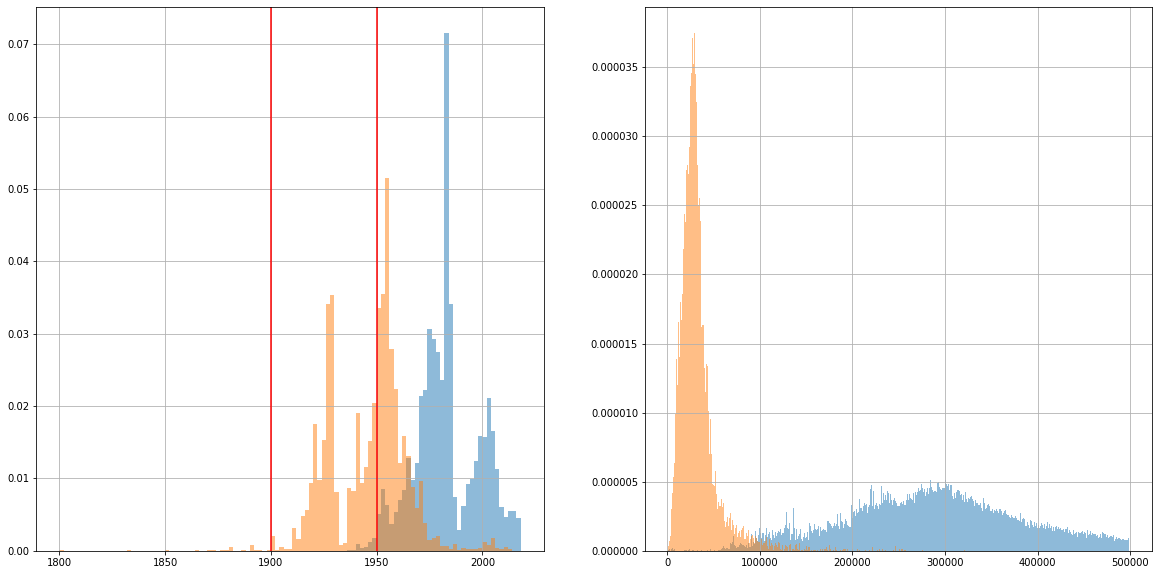

In [43]:
year_histogram('anchorage')

In [44]:
import numbers

import numpy as np
import matplotlib.pyplot as plt


def qqplot(x, y, quantiles=None, interpolation='nearest', ax=None, rug=False,
           rug_length=0.05, rug_kwargs=None, **kwargs):
    """Draw a quantile-quantile plot for `x` versus `y`.

    Parameters
    ----------
    x, y : array-like
        One-dimensional numeric arrays.

    ax : matplotlib.axes.Axes, optional
        Axes on which to plot. If not provided, the current axes will be used.

    quantiles : int or array-like, optional
        Quantiles to include in the plot. This can be an array of quantiles, in
        which case only the specified quantiles of `x` and `y` will be plotted.
        If this is an int `n`, then the quantiles will be `n` evenly spaced
        points between 0 and 1. If this is None, then `min(len(x), len(y))`
        evenly spaced quantiles between 0 and 1 will be computed.

    interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
        Specify the interpolation method used to find quantiles when `quantiles`
        is an int or None. See the documentation for numpy.quantile().

    rug : bool, optional
        If True, draw a rug plot representing both samples on the horizontal and
        vertical axes. If False, no rug plot is drawn.

    rug_length : float in [0, 1], optional
        Specifies the length of the rug plot lines as a fraction of the total
        vertical or horizontal length.

    rug_kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.axvline() and
        matplotlib.axes.Axes.axhline() when drawing rug plots.

    kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.scatter() when drawing
        the q-q plot.
    """
    # Get current axes if none are provided
    if ax is None:
        ax = plt.gca()

    if quantiles is None:
        quantiles = min(len(x), len(y))

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation=interpolation)
    y_quantiles = np.quantile(y, quantiles, interpolation=interpolation)
    #print(x_quantiles)
    #print(y_quantiles)

    # Draw the rug plots if requested
    if rug:
        # Default rug plot settings
        rug_x_params = dict(ymin=0, ymax=rug_length, c='gray', alpha=0.5)
        rug_y_params = dict(xmin=0, xmax=rug_length, c='gray', alpha=0.5)

        # Override default setting by any user-specified settings
        if rug_kwargs is not None:
            rug_x_params.update(rug_kwargs)
            rug_y_params.update(rug_kwargs)

        # Draw the rug plots
        for point in x:
            ax.axvline(point, **rug_x_params)
        for point in y:
            ax.axhline(point, **rug_y_params)

    # Draw the q-q plot
    ax.scatter(x_quantiles, y_quantiles, **kwargs)
    
## Setup

## Draw quantile-quantile plot
#plt.figure()
#qqplot(all_df['atlanta']['RESYRBLT'].values, all_df['boston']['YR_BUILT'].values, quantiles = 1000, c='r', alpha=0.5, edgecolor='k')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.show()